In [1]:
import numpy as np;
import pandas as pd;
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm ;
from sklearn.linear_model import LogisticRegression;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.ensemble import GradientBoostingClassifier;
from sklearn.metrics import accuracy_score
import seaborn as sns;
import matplotlib.pyplot as plt;

In [2]:
df = pd.read_csv('./diabetes.csv');

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)

Outcome
0    500
1    268
Name: count, dtype: int64


In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Text(0.5, 1.0, 'Outcome Counts')

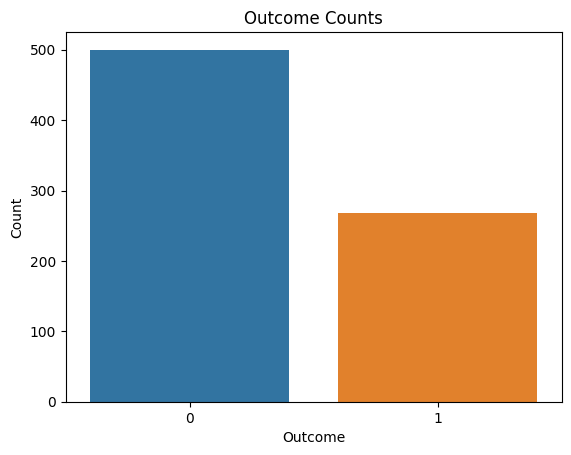

In [10]:
sns.barplot(x=outcome_counts.index,y=outcome_counts.values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Counts')

In [11]:
x = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [12]:
print(x[:5])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]


In [13]:
print(y[:5])

[1 0 1 0 1]


In [14]:
scaler = StandardScaler();
scaler.fit(x);

In [15]:
x = scaler.transform(x)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [17]:
print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


In [18]:
models = [
    svm.SVC(kernel='linear'),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier()
]

In [19]:
best_accuracy = 0
best_model = None
test_accuracy_scores = []
train_accuracy_scores = []

for model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy_test = accuracy_score(y_test, predictions)
    predictions = model.predict(x_train);
    accuracy_train = accuracy_score(y_train, predictions)
    test_accuracy_scores.append(accuracy_test)
    train_accuracy_scores.append(accuracy_train)
    
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = model

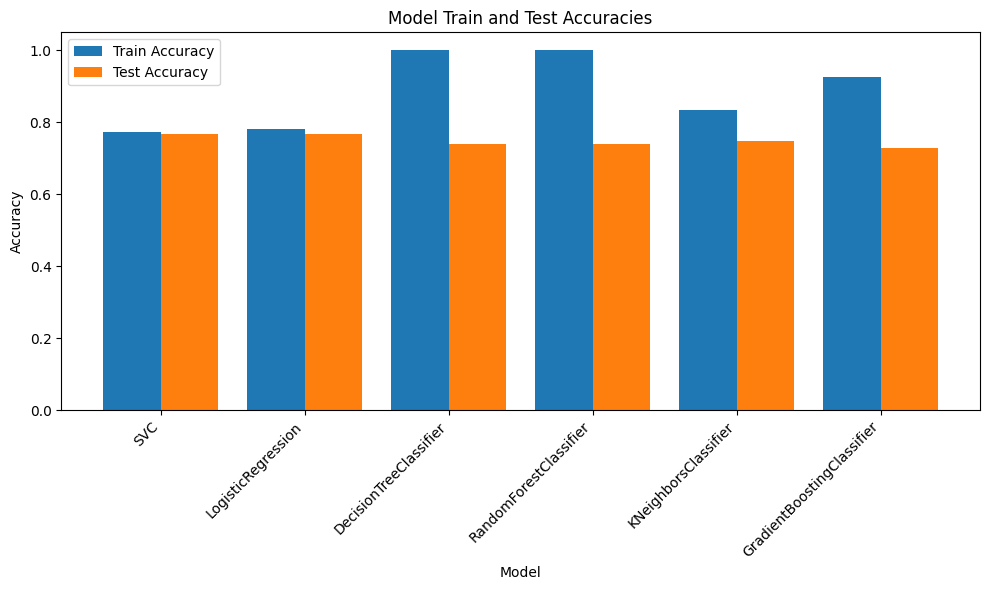

In [20]:
plt.figure(figsize=(10, 6))
x = range(len(models))
width = 0.4

plt.bar(x, train_accuracy_scores, width, label='Train Accuracy')
plt.bar([i + width for i in x], test_accuracy_scores, width, label='Test Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Train and Test Accuracies')
plt.xticks([i + width/2 for i in x], [str(model).split('(')[0] for model in models], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

Best Model: SVC(kernel='linear')
Best Accuracy: 0.7662337662337663


In [23]:
import joblib;

In [24]:
joblib.dump(best_model,'diabetes_model.joblib')
joblib.dump(scaler,'diabetes_scaler.joblib')

['diabetes_scaler.joblib']

In [22]:
input_data = (5,166,72,19,175,25.8,0.587,51)


input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = best_model.predict(std_data)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is diabetic
